## import nesseray libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


## Reading dataset

In [57]:
sales=pd.read_csv("walmartsales.csv")

## Data preprocessing

In [59]:

sales['Date']=pd.to_datetime(sales['Date'], format="mixed")


## Feature engineering

In [60]:
sales['monthdate']=sales['Date'].dt.month
sales['yeardate']=sales['Date'].dt.year

## EDA on data

#### display data

In [5]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,monthdate,yeardate
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010


In [6]:
sales.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,monthdate,yeardate
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,10,2012


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   monthdate     6435 non-null   int32         
 9   yeardate      6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2)
memory usage: 452.6 KB


In [8]:
sales.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,monthdate,yeardate
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,6.475524,2010.965035
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,6.000000,2011.000000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,9.000000,2012.000000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,3.321797,0.797019


In [9]:
sales.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
monthdate         12
yeardate           3
dtype: int64

## Finding correlation between features 

In [61]:
# numeric_data = sales.select_dtypes(include='number')

sales.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,monthdate,yeardate
Store,1.000000e+00,-9.235528e-14,-0.335332,-4.735625e-16,-0.022659,0.060023,-0.209492,0.223531,6.323208e-16,3.474332e-12
Date,-9.235528e-14,1.000000e+00,0.004592,5.698654e-02,0.088567,0.752605,0.074530,-0.239901,2.059187e-01,9.399969e-01
Weekly_Sales,-3.353320e-01,4.591803e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,6.753523e-02,-1.837754e-02
Holiday_Flag,-4.735625e-16,5.698654e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,3.322341e-01,-5.678257e-02
Temperature,-2.265908e-02,8.856737e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.643970e-02,6.426923e-02
Fuel_Price,6.002295e-02,7.526049e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-5.283174e-02,7.794703e-01
CPI,-2.094919e-01,7.452964e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,1.478843e-03,7.479573e-02
Unemployment,2.235313e-01,-2.399007e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.061552e-03,-2.418135e-01
monthdate,6.323208e-16,2.059187e-01,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,1.000000e+00,-1.390145e-01
yeardate,3.474332e-12,9.399969e-01,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-1.390145e-01,1.000000e+00


In [62]:
sales.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
monthdate                int32
yeardate                 int32
dtype: object

In [63]:
sales.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
monthdate       0.067535
Holiday_Flag    0.036891
Fuel_Price      0.009464
Date            0.004592
yeardate       -0.018378
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64

<Axes: >

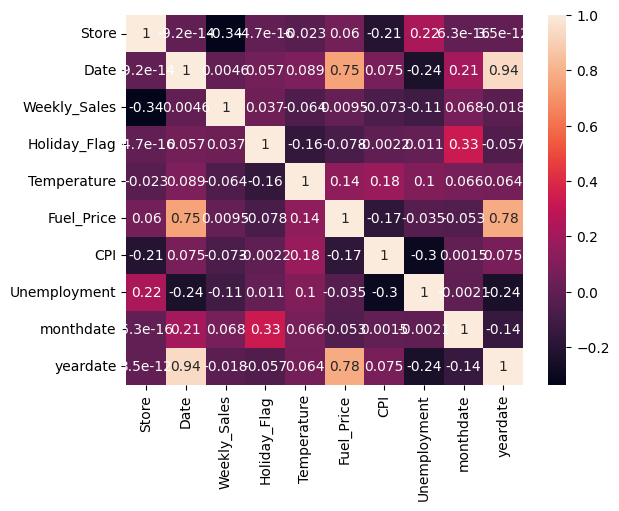

In [64]:
sns.heatmap(sales.corr(), annot=True)

#### visualize quantitative variables distributions

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Weekly_Sales'}>],
       [<Axes: title={'center': 'Holiday_Flag'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'monthdate'}>],
       [<Axes: title={'center': 'yeardate'}>, <Axes: >, <Axes: >]],
      dtype=object)

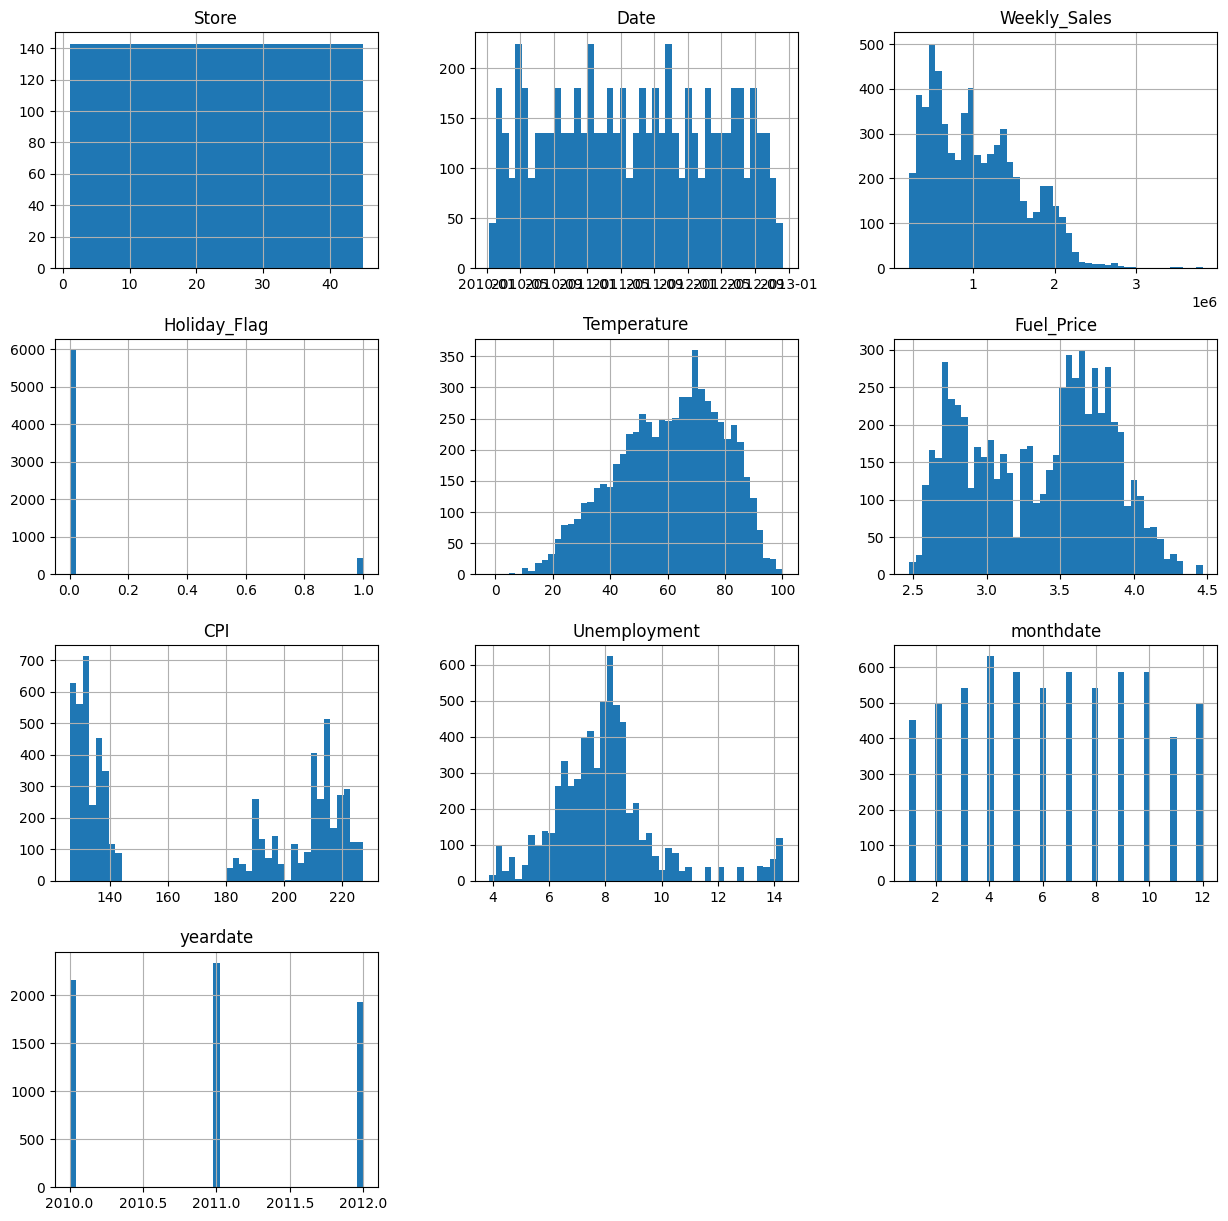

In [14]:
sales.hist(figsize=(15,15),bins=45)

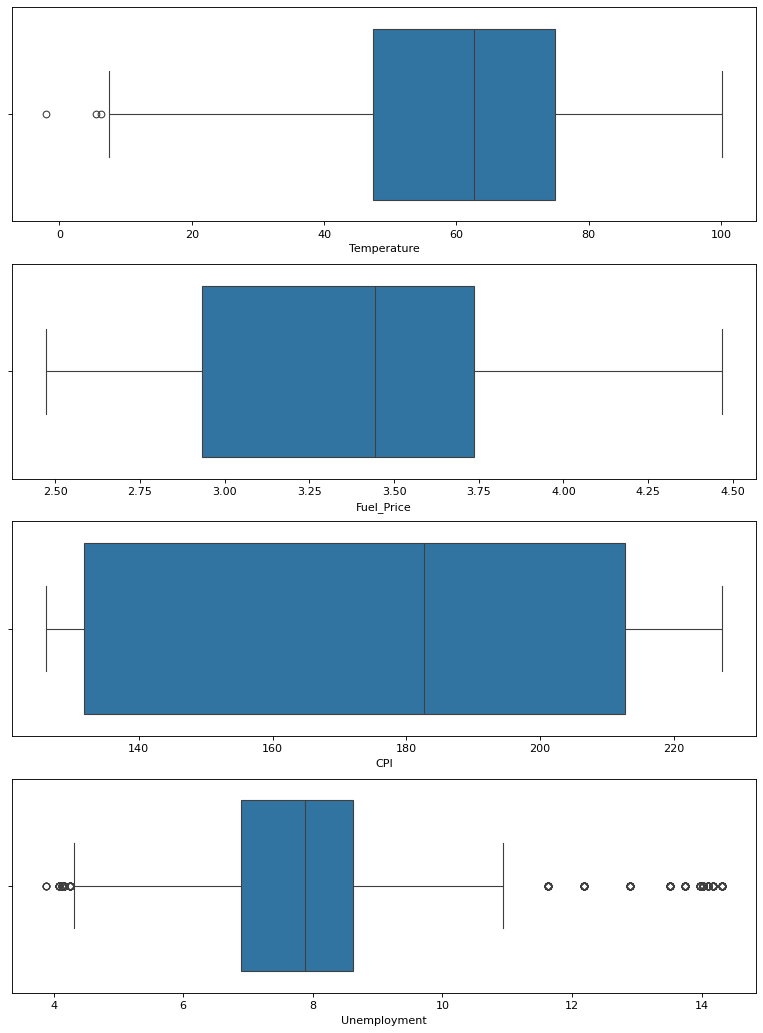

In [52]:
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = sales[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(x=sales[column], ax=axis[i])


## Data cleaning

In [32]:
sales.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
monthdate       0
yeardate        0
dtype: int64

In [33]:
sales.drop_duplicates(inplace=True)

#### A. Which store has maximum sales?

In [65]:
maxstore = sales.groupby(['Store'])['Weekly_Sales'].sum().round().sort_values(ascending=False).head(1)
maxstore

Store
20    301397792.0
Name: Weekly_Sales, dtype: float64

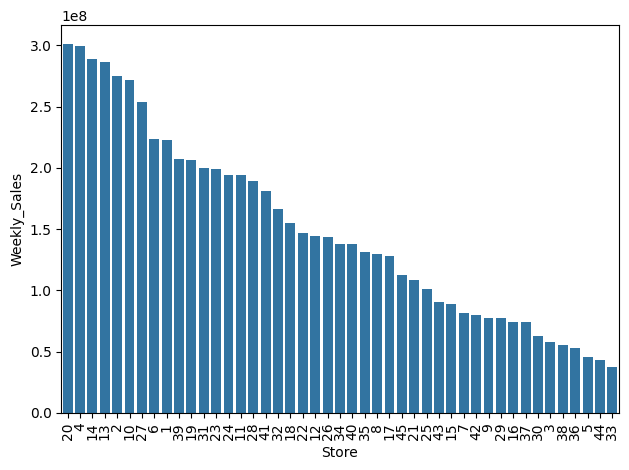

In [66]:
avg_sales_by_store = sales.groupby('Store')['Weekly_Sales'].sum().reset_index()
sns.barplot(data=avg_sales_by_store, x='Store', y='Weekly_Sales',order = avg_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Store'])
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()

#### B.Which store has maximum standard deviation i.e., the sales vary a lot

In [81]:
maxstd = sales.groupby(['Store'])['Weekly_Sales'].std().sort_values(ascending=False).head(1)
maxstd

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

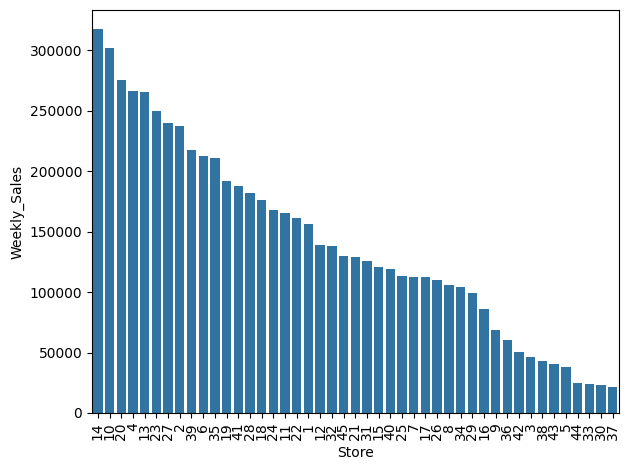

In [82]:
std_sales_by_store = sales.groupby('Store')['Weekly_Sales'].std().reset_index()
sns.barplot(data=std_sales_by_store, x='Store', y='Weekly_Sales',order = std_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Store'])
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()

### c)Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

In [68]:
Super_Bowl = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day = ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']


In [69]:
# Super_Bowl=pd.to_datetime(Super_Bowl)
Super_Bowl_sales = sales.loc[sales.Date.isin(Super_Bowl)]['Weekly_Sales'].mean()
Labour_Day_sales = sales.loc[sales.Date.isin(Labour_Day)]['Weekly_Sales'].mean()
Thanksgiving_sales = sales.loc[sales.Date.isin(Thanksgiving)]['Weekly_Sales'].mean()
Christmas_sales = sales.loc[sales.Date.isin(Christmas)]['Weekly_Sales'].mean()


/var/folders/01/_nbl43b94c714j63ptzqdmjc0000gn/T/ipykernel_2225/3126803350.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Super_Bowl_sales = sales.loc[sales.Date.isin(Super_Bowl)]['Weekly_Sales'].mean()
/var/folders/01/_nbl43b94c714j63ptzqdmjc0000gn/T/ipykernel_2225/3126803350.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  Labour_Day_sales = sales.loc[sales.Date.isin(Labour_Day)]['Weekly_Sales'].mean()
/var/folders/01/_nbl43b94c714j63ptzqdmjc0000gn/T/ipykernel_2225/3126803350.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.

In [70]:
print(Super_Bowl_sales)
print(Labour_Day_sales)  
print(Thanksgiving_sales)
print(Christmas_sales)

1079127.9877037038
1042427.293925926
1471273.427777778
960833.1115555555


In [21]:
non_holiday_sales = sales[(sales['Holiday_Flag'] == 0)]['Weekly_Sales'].mean()
non_holiday_sales

1041256.3802088555

In [71]:
result = pd.DataFrame([{'Super Bowl Sales':Super_Bowl_sales,
 'Labour Day Sales':Labour_Day_sales,
 'Thanksgiving Sales':Thanksgiving_sales,
 'Christmas Sales':Christmas_sales,
 'Non Holiday Sales':non_holiday_sales}]).T

result

,0
Super Bowl Sales,1.079128e+06
Labour Day Sales,1.042427e+06
Thanksgiving Sales,1.471273e+06
Christmas Sales,9.608331e+05
Non Holiday Sales,1.041256e+06


####  D. Provide a monthly and semester view of sales in units and give insights.

<Axes: xlabel='monthdate', ylabel='Weekly_Sales'>

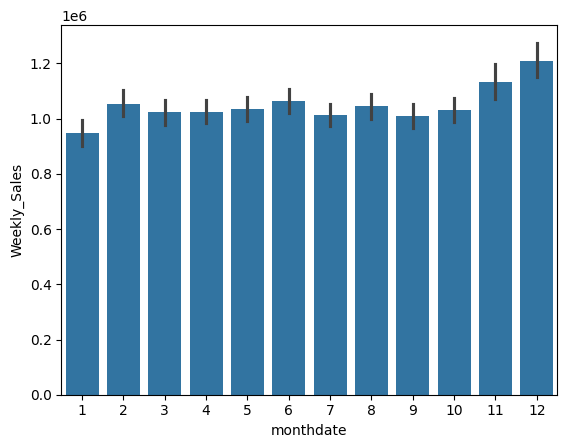

In [87]:
sns.barplot(x=sales['monthdate'], y=sales['Weekly_Sales'])


<Axes: xlabel='monthdate', ylabel='Weekly_Sales'>

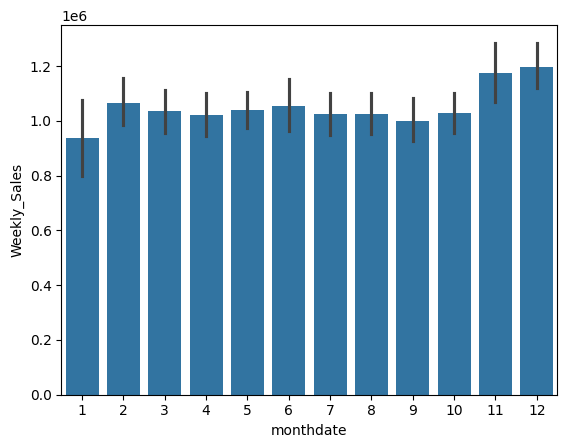

In [24]:
sns.barplot(x=sales[sales.yeardate==2010]['monthdate'],  y=sales[sales.yeardate==2010]['Weekly_Sales'])

<Axes: xlabel='monthdate', ylabel='Weekly_Sales'>

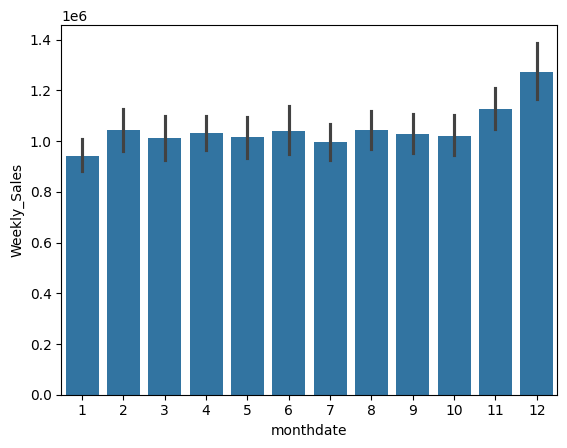

In [25]:
sns.barplot(x=sales[sales.yeardate==2011]['monthdate'],  y=sales[sales.yeardate==2011]['Weekly_Sales'])

<Axes: xlabel='monthdate', ylabel='Weekly_Sales'>

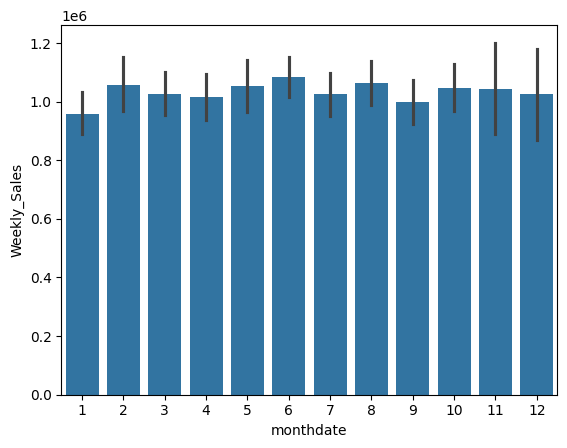

In [26]:
sns.barplot(x=sales[sales.yeardate==2012]['monthdate'],  y=sales[sales.yeardate==2012]['Weekly_Sales'])

In [72]:
sales['Semester'] = np.where(sales['Date'].dt.quarter <= 2, '1st Semester', '2nd Semester')
semester_sales = sales.groupby('Semester')['Weekly_Sales'].sum()
semester_sales

Semester
1st Semester    3.327977e+09
2nd Semester    3.409242e+09
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Semester', ylabel='Weekly_Sales'>

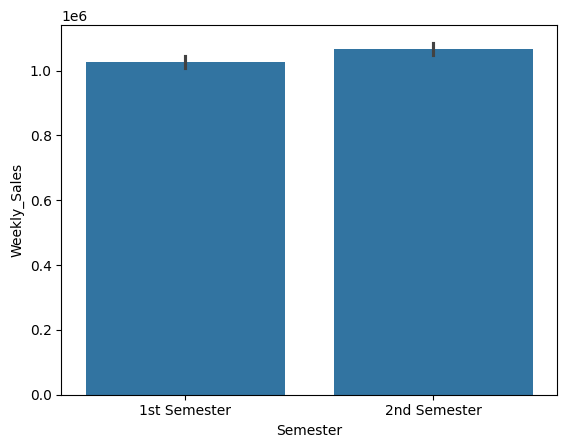

In [74]:
sns.barplot(x=sales["Semester"], y= sales["Weekly_Sales"])

#### for monthly view, months 12, 6 have the highest sales among all years.
#### for semester view, the two semesters almost have the same sales, but semester 2 is the highest on sales 

## E. Plot the relations between weekly sales vs. other numeric features and give insights.

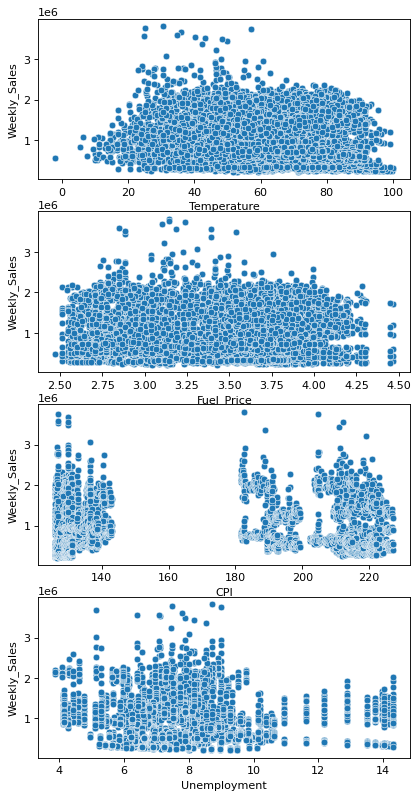

In [88]:
fig, axis = plt.subplots(4, figsize=(6,12), dpi=80)
x = sales[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.scatterplot(x=sales[column], y= sales['Weekly_Sales'], ax=axis[i])

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

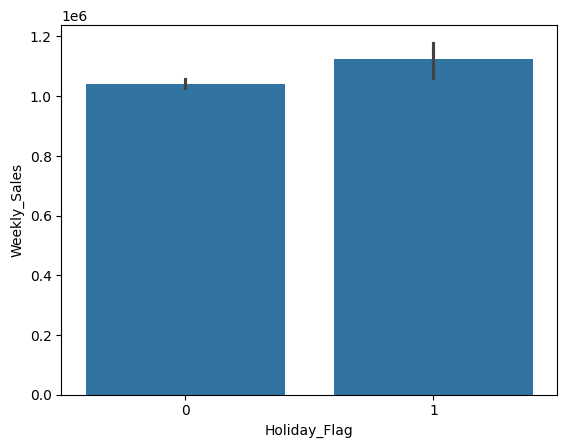

In [31]:
sns.barplot(y=sales['Weekly_Sales'], x=sales['Holiday_Flag'])

#### there is no relation between weekly sales and other numerical values as the scatter plot does not repersent a relationship